# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

- Изучим общую информацию из полученных данных.
- Проверим корректность полученных данных, зафиксируем или попробуем исправить недостающие или неправдоподбные данные.
- Добавим несколько столбцов для удобного изучения данных.
- Просмотрим каждый столбец более детально и попробуем сделать аналитику.
- Выявим факторы, которын больше всего влияют на стоимость квартир.
- Установим как быстро они продаются.
- Посчитаем среднюю стоимость квадратного км для 10 населнных пунктов, где больше всего размещено объявлений.
- Сделаем общий вывод.

### Откройте файл с данными и изучите общую информацию. 

In [7]:
#импортировали библиотеку
import pandas as pd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


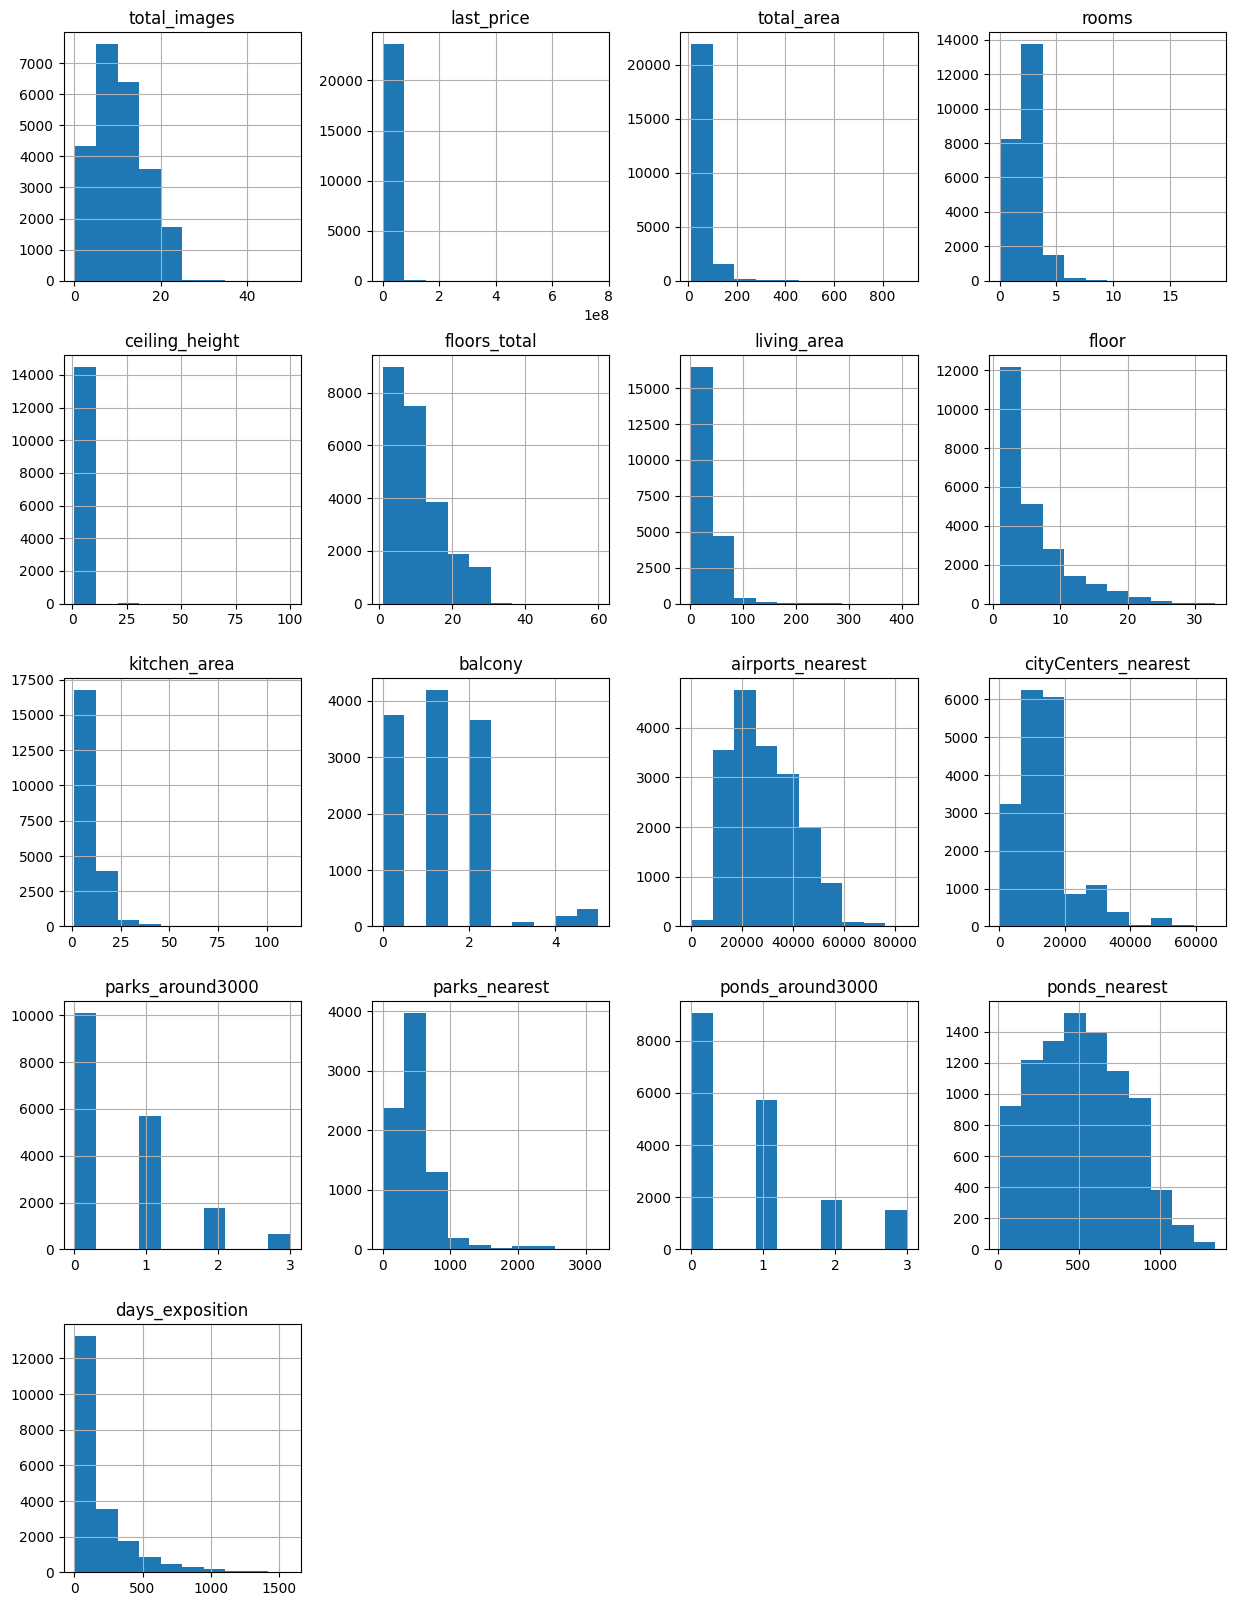

In [8]:
#код загрузки датасета
data = pd.read_csv('/content/real_estate_data (1).csv', sep='\t')
data.info()
display(data.head(10))
data.hist(figsize=(15, 20));

In [9]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пропущенные значения' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

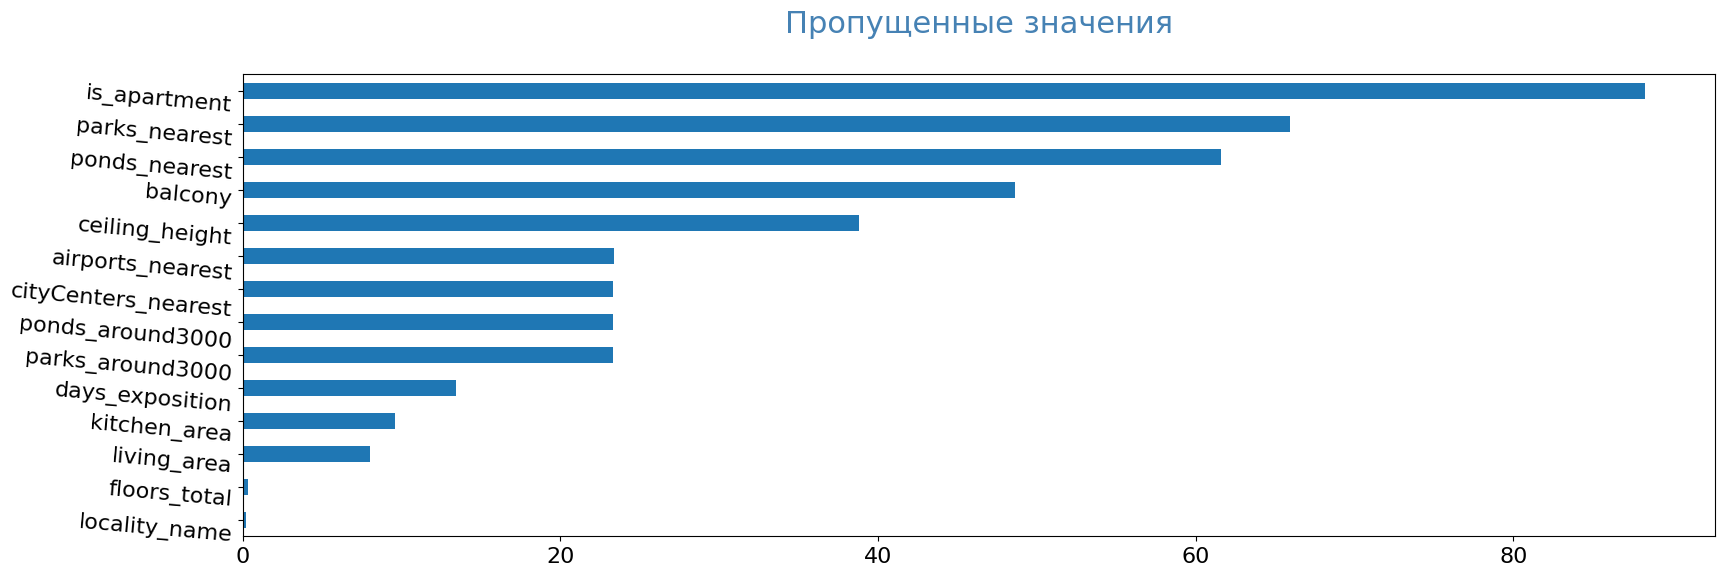

In [10]:
pass_value_barh(data)

#### check gap
1. Находим и изучаем пропущенные значения в столбцах:
+ Есть пропуски в столбцах со значениями по балконам, паркам. водоемам в пределах 3 км. В высоте потолков, площади кухни, сроке продажи, расстояния до ближайших аээропортов, центра города.
+ Заполним пропущенные значения в балконах, парках и водоемах в пределах 3 км, высоте потолков, площади кухни, ближайших аэропортов, парках и водоемах. Пропуски оставим в названиях населенных пунктов, ближайших аэропортах, сроке продажи и расстоянии до центра города.
+ Нужно сообщить о том, что есть такие пропуски. Они могут быть вызваны тем, что не все хотят заполнять все колонки для подачи объявления.

In [11]:
# Заменяем пропущенные значения по балконам, паркам и водоемам в пределах 3 км на 0, т.к. логично предположить если значения нет, то их и нет.
# Высоту потолков, площадь кухни, срок продажи, расстояние до ближайших аэропортов,
# центра города, парков и водоемов заменим на среднее. Пропущенных значений немного, они не повлияют на результат исследования.
data.loc[:, 'balcony'] = data.loc[:,'balcony'].fillna('0')
data.loc[:, 'parks_around3000'] = data.loc[:,'parks_around3000'].fillna('0')
data.loc[:, 'ponds_around3000'] = data.loc[:,'ponds_around3000'].fillna('0')
data.loc[:, 'ceiling_height'] = data.loc[:,'ceiling_height'].fillna(data['ceiling_height'].mean())
data.loc[:, 'kitchen_area'] = data.loc[:,'kitchen_area'].fillna(data['kitchen_area'].mean())
data.loc[:, 'airports_nearest'] = data.loc[:,'airports_nearest'].fillna(data['airports_nearest'].mean())
data.loc[:, 'parks_nearest'] = data.loc[:,'parks_nearest'].fillna(data['parks_nearest'].mean())
data.loc[:, 'ponds_nearest'] = data.loc[:,'ponds_nearest'].fillna(data['ponds_nearest'].mean())
data = data.dropna(subset=['floors_total'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21743 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  object 
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

2. Рассмотрим типы данных в каждом столбце:
+ Найдем столбцы, в которых нужно изменить тип данных.
+ Преобразуем тип данных в выбранных столбцах.

In [12]:
# проверил все значения столбцов, обнаружил проблему в типе данных со временем. Приводим к нужному типу. 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# Также после замены значений в столбцах нужно снова привести к числовым типам данных.
data['balcony'] = data['balcony'].astype('int')
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
#Заменяем значения в столбце предназначения для апартаментов, т.к. можно предположить, что кто не заполнил данную колонку не относится к данной категории.
data['is_apartment'] = data['is_apartment'].fillna('False')
data['is_apartment'] = data['is_apartment'].astype('bool')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

<ipython-input-12-d5335a02f69a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
<ipython-input-12-d5335a02f69a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['balcony'] = data['balcony'].astype('int')
<ipython-input-12-d5335a02f69a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

3. Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов.

In [13]:
# Проверяем названия населенных пунктов на наличие раличных форматов записей. 
# Заменил дубликаты.
data['locality_name'] = data['locality_name'].replace('посёлок Пансионат Зелёный Бор', 'поселок Пансионат Зелёный Бор')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Рябово', 'поселок Рябово')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Рябово', 'поселок Рябово')
data['locality_name'] = data['locality_name'].replace('посёлок Тельмана', 'поселок Тельмана')
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')
data['locality_name'] = data['locality_name'].replace('посёлок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].replace('поселок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].replace('посёлок Бугры', 'поселок Бугры')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Красный Бор', 'поселок городского типа Красный Бор')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа имени Свердлова', 'поселок городского типа имени Свердлова')
data['locality_name'] = data['locality_name'].replace('городской поселок Большая Ижора', 'поселок городского типа Большая Ижора')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Кузьмоловский', 'поселок городского типа Кузьмоловский')
data['locality_name'] = data['locality_name'].replace('городской посёлок Янино-1', 'городской поселок Янино-1')
data['locality_name'] = data['locality_name'].replace('посёлок Лисий Нос', 'поселок Лисий Нос')
data['locality_name'] = data['locality_name'].replace('посёлок Новый Свет', 'поселок Новый Свет')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Токсово', 'поселок городского типа Токсово')
data['locality_name'] = data['locality_name'].replace('посёлок Мичуринское', 'поселок Мичуринское')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Рощино', 'городской посёлок Рощино')
data['locality_name'] = data['locality_name'].replace('посёлок Возрождение', 'поселок Возрождение')
data['locality_name'] = data['locality_name'].replace('посёлок Сумино', 'поселок Сумино')
data['locality_name'] = data['locality_name'].replace('посёлок станции Громово', 'поселок Громово')
data['locality_name'] = data['locality_name'].replace('посёлок Старая Малукса', 'поселок Старая Малукса')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Вырица', 'поселок городского типа Вырица')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Назия', 'городской посёлок Назия')
data['locality_name'] = data['locality_name'].replace('посёлок Петровское', 'поселок Петровское')
data['locality_name'] = data['locality_name'].replace('посёлок Терволово', 'поселок Терволово')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Советский', 'городской посёлок Советский')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Павлово', 'городской посёлок Павлово')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Лесогорский', 'городской посёлок Лесогорский')
data['locality_name'] = data['locality_name'].replace('посёлок Ильичёво', 'поселок Ильичёво')
data['locality_name'] = data['locality_name'].replace('посёлок Аннино', 'поселок Аннино')
data['locality_name'] = data['locality_name'].replace('посёлок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское')
data['locality_name'] = data['locality_name'].replace('посёлок Мельниково', 'поселок Мельниково')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Форносово', 'поселок городского типа Форносово')
data['locality_name'] = data['locality_name'].replace('посёлок Перово', 'поселок Перово')
data['locality_name'] = data['locality_name'].replace('посёлок Жилгородок', 'поселок Жилгородок')
data['locality_name'] = data['locality_name'].replace('посёлок Кобралово', 'поселок Кобралово')
data['locality_name'] = data['locality_name'].replace('посёлок Усть-Луга', 'поселок Усть-Луга')
data['locality_name'] = data['locality_name'].replace('посёлок Поляны', 'поселок Поляны')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Мга', 'городской посёлок Мга')
data['locality_name'] = data['locality_name'].replace('посёлок при железнодорожной станции Вещево', 'поселок станции Вещево')
data['locality_name'] = data['locality_name'].replace('посёлок Гаврилово', 'поселок Гаврилово')
data['locality_name'] = data['locality_name'].replace('посёлок Коробицыно', 'поселок Коробицыно')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Лебяжье', 'поселок городского типа Лебяжье')

data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area             1870
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             48
airports_nearest           0
cityCenters_nearest     5509
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3172
dtype: int64

4. Найдем и устраним редкие и выбивающиеся значения. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. 

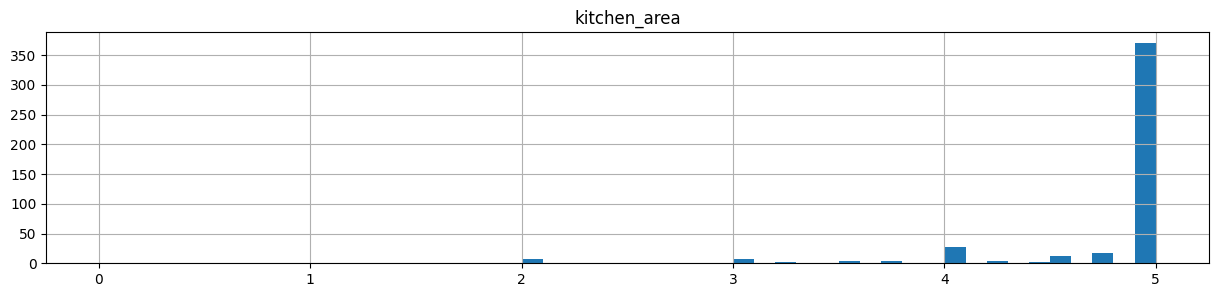

In [14]:
# check
data.hist(column = 'kitchen_area', bins = 50, figsize = (15,3), range = (0,5));

In [15]:
# Проверяем столбцы на аномальные значения. Из всех выделяется только с высотой потолков. Исправляем значения. Ищем двумя способами, unique и describe.
data['ceiling_height'] = data['ceiling_height'].replace(32, 3.2)
data['ceiling_height'] = data['ceiling_height'].replace(25, 2.5)
data['ceiling_height'] = data['ceiling_height'].replace(27, 2.7)
data['ceiling_height'] = data['ceiling_height'].replace(24, 2.4)
data['ceiling_height'] = data['ceiling_height'].replace(14, 1.4)
data['ceiling_height'] = data['ceiling_height'].replace(20, 2.0)
data['ceiling_height'] = data['ceiling_height'].replace(26, 2.6)
data['ceiling_height'] = data['ceiling_height'].replace(100, 10.0)
data['ceiling_height'] = data['ceiling_height'].replace(22.6, 2.26)
data['ceiling_height'] = data['ceiling_height'].replace(27.5, 2.75)
# Также видел большую кухню на 100 м площади, квартиры по 400 м и 60 этажные дома.
list = [10.3, 10]
data = data.loc[~data['ceiling_height'].isin(list)]

#Проверил количество аномалий с помощью len, hist и решил удалить выбивающиеся значения: 
data = data.query('2.2 < ceiling_height < 7')
data = data.query('0 < rooms < 7')
data = data.query('20 < total_area < 200')  
print ('до I удаления', data.shape[0])
data = data.query('days_exposition.isna() | 3 < days_exposition < 1200')
print ('после I удаления', data.shape[0])

data = data.query('1000000 < last_price < 36000000')

print ('до II удаления', data.shape[0])
data = data.query('living_area.isna() | 13 < living_area < 250')
data = data.query('5 <= kitchen_area < 50')
print ('после II удаления', data.shape[0])

data = data.query('floors_total < 37')

до I удаления 23118
после I удаления 23027
до II удаления 22655
после II удаления 22328


#### check gap

In [19]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22327 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22327 non-null  int64         
 1   last_price            22327 non-null  int64         
 2   total_area            22327 non-null  float64       
 3   first_day_exposition  22327 non-null  datetime64[ns]
 4   rooms                 22327 non-null  int64         
 5   ceiling_height        22327 non-null  float64       
 6   floors_total          22327 non-null  int64         
 7   living_area           20576 non-null  float64       
 8   floor                 22327 non-null  int64         
 9   is_apartment          22327 non-null  bool          
 10  studio                22327 non-null  bool          
 11  open_plan             22327 non-null  bool          
 12  kitchen_area          22327 non-null  float64       
 13  balcony         

In [20]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,327.00","22,327.00","22,327.00","19,360.00","22,327.00","20,576.00","22,327.00","22,327.00","22,327.00"
min,1.00,20.10,2.25,3.00,"1,010,000.00",13.05,5.00,1.00,1.00
max,6.00,199.20,5.30,"1,199.00","35,900,000.00",164.70,49.40,33.00,36.00


In [21]:
# check
data.rooms.value_counts().to_frame()

,rooms
2,7697
1,7610
3,5631
4,1086
5,246
6,57


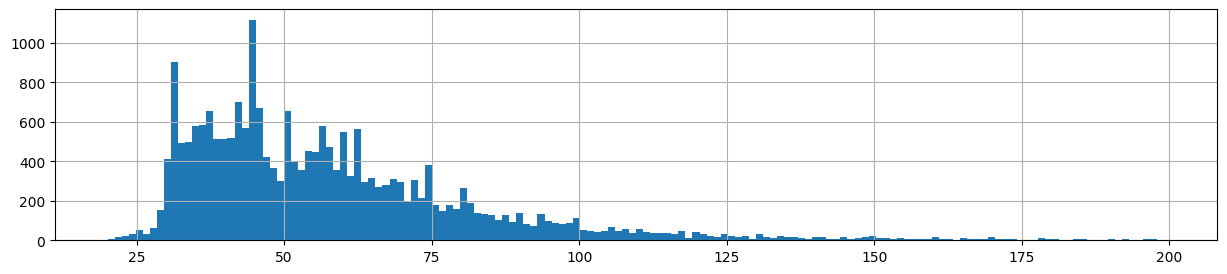

In [22]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

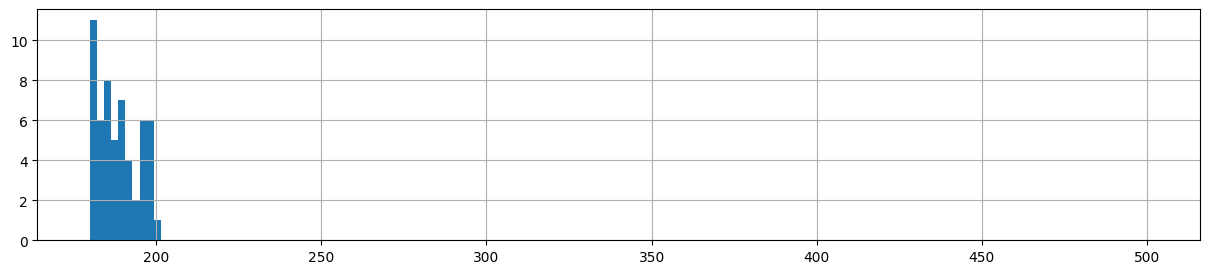

In [23]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

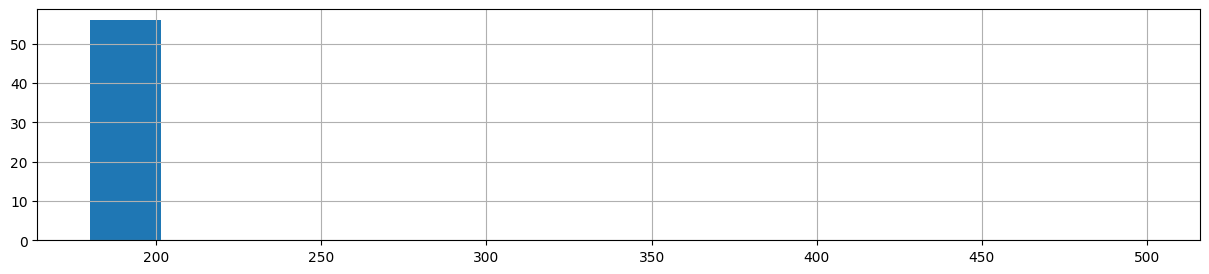

In [24]:
# check
data.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

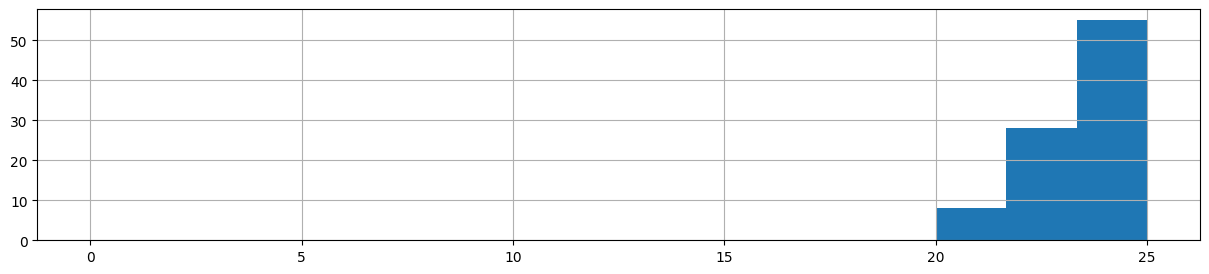

In [25]:
# check
data.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [26]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.001200,1.00,23.00,2.40,3.00,"1,070,000.00",13.40,5.00,1.00,2.00
0.010000,1.00,28.50,2.50,4.00,"1,300,000.00",14.10,5.00,1.00,2.00
0.500000,2.00,52.00,2.77,94.50,"4,650,000.00",30.00,9.80,4.00,9.00
0.990000,5.00,152.15,3.50,979.41,"23,500,000.00",93.03,30.00,23.00,26.00
0.998800,6.00,188.02,4.10,"1,163.77","33,000,000.00",123.93,43.00,26.00,29.84


### Посчитайте и добавьте в таблицу новые столбцы

In [27]:
#Рассчитываем стоимость квадратного метра и добавляем новый столбец.
data['price_square'] = data['last_price'] / data['total_area']
#Добавляем новые столбцы с днем недели, месяцем и годом.
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
#Напишем цикл для группировки этажей.
def floor(row):
    i = row['floor']
    b = row['floors_total']
    if i == 1:
        return 'первый'
    if i!= 1 and i == b:
        return 'последний'
    return 'другой'
data['type_floor'] = data.apply(floor, axis = 1)
#Добавляем столбец с расстоянием до центра города в км.
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square,weekday,month,year,type_floor,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.700000,16,51.0,8,True,...,482.000000,2.0,755.0000,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.771499,11,18.6,1,True,...,490.804555,0.0,517.9809,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.771499,5,34.3,4,True,...,90.000000,2.0,574.0000,558.0,92785.714286,3,8,2015,другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.030000,14,32.0,13,True,...,112.000000,1.0,48.0000,121.0,100000.000000,1,6,2018,другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.771499,12,14.4,5,True,...,490.804555,0,517.9809,55.0,95065.789474,0,9,2018,другой,NaN


### Проведите исследовательский анализ данных

Шаг 4. Проведите исследовательский анализ данных:
1.	Изучите следующие параметры объектов:
    +	общая площадь;
    +	жилая площадь;
    +	площадь кухни;
    +	цена объекта;
    +	количество комнат;
    +	высота потолков;
    +	этаж квартиры;
    +	тип этажа квартиры («первый», «последний», «другой»);
    +	общее количество этажей в доме;
    +	расстояние до центра города в метрах;
    +	расстояние до ближайшего аэропорта;
    +	расстояние до ближайшего парка;
    +	день и месяц публикации объявления.


<Axes: >

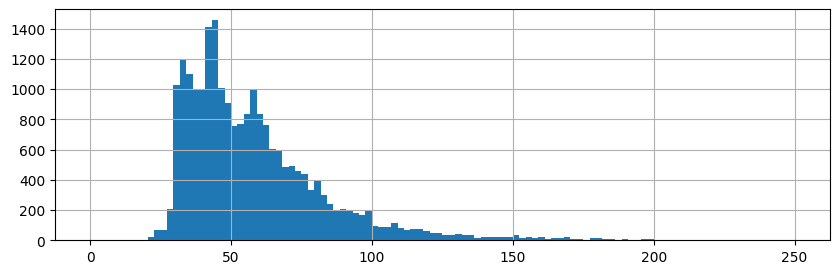

In [28]:
data['total_area'].hist(bins = 110, figsize = (10,3), range=(0, 250))

<Axes: >

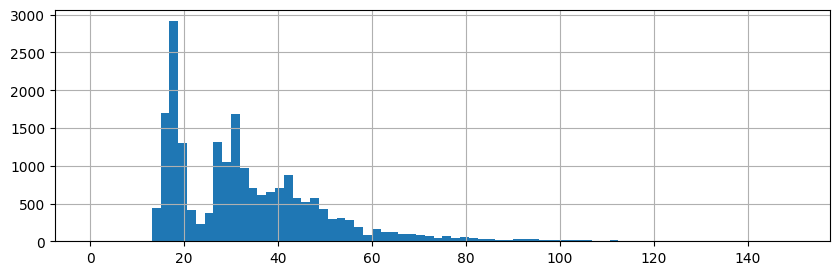

In [29]:
data['living_area'].hist(bins = 80, figsize = (10,3), range=(0, 150))

<Axes: >

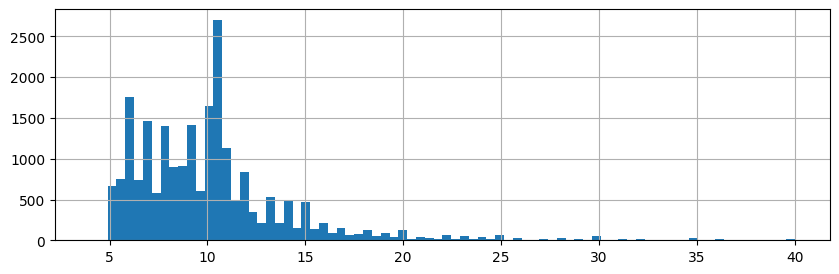

In [30]:
data['kitchen_area'].hist(bins = 80, figsize = (10,3), range=(4, 40))

<Axes: >

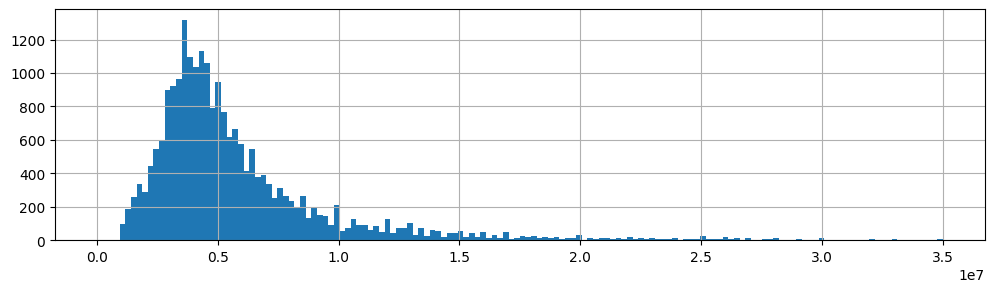

In [31]:
data['last_price'].hist(bins = 150, figsize = (12,3), range=(0, 35000000))

<Axes: >

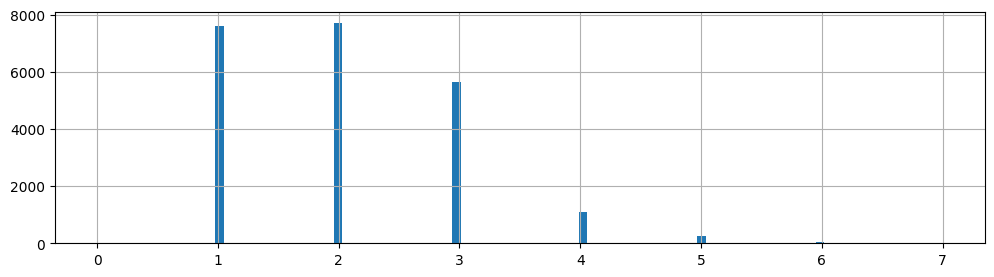

In [32]:
data['rooms'].hist(bins = 100, figsize = (12,3), range=(0, 7))

<Axes: >

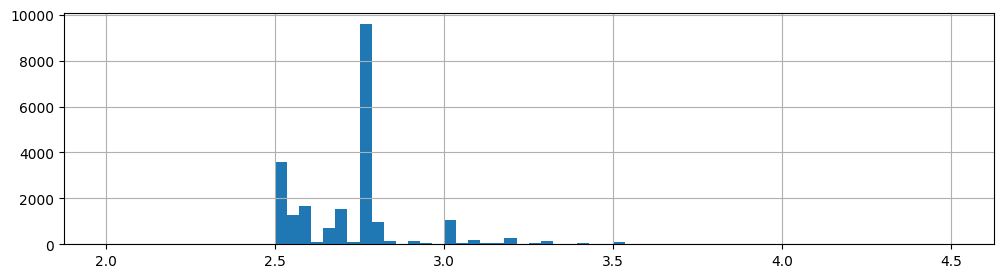

In [33]:
data['ceiling_height'].hist(bins = 70, figsize = (12,3), range=(2, 4.5))

<Axes: >

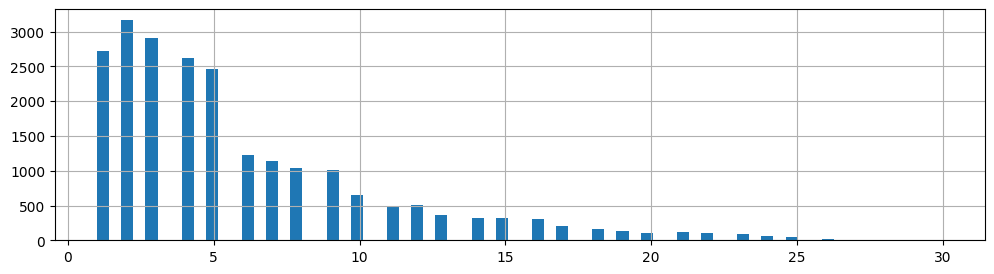

In [34]:
data['floor'].hist(bins = 70, figsize = (12,3), range=(1, 30))

<Axes: >

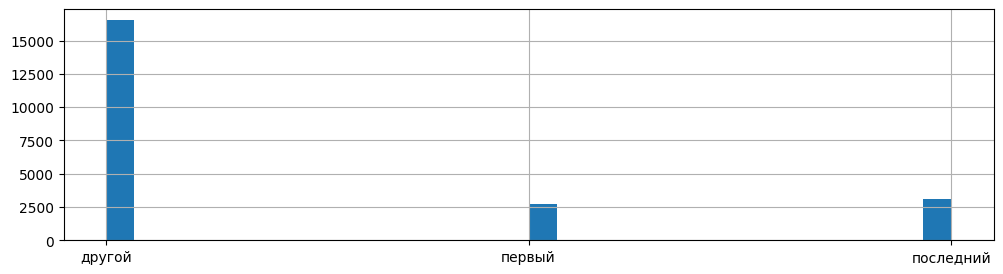

In [35]:
data['type_floor'].hist(bins = 30, figsize = (12,3))

<Axes: >

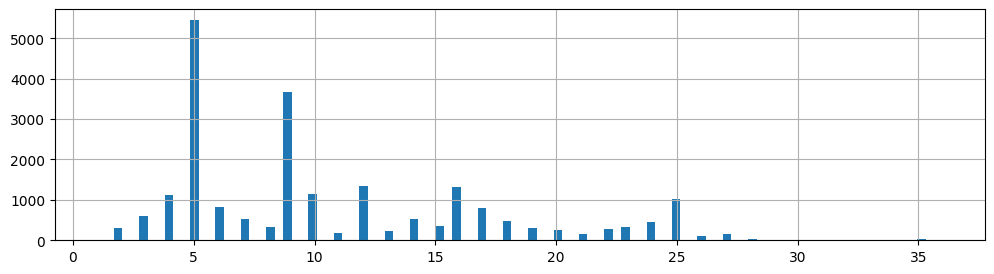

In [36]:
data['floors_total'].hist(bins = 100, figsize = (12,3))

<Axes: >

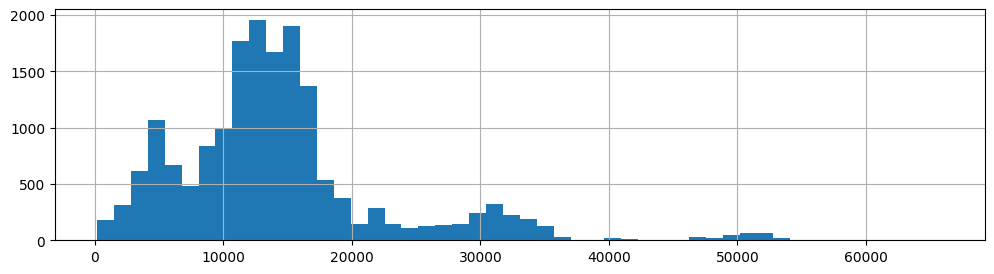

In [37]:
data['cityCenters_nearest'].hist(bins = 50, figsize = (12,3))

<Axes: >

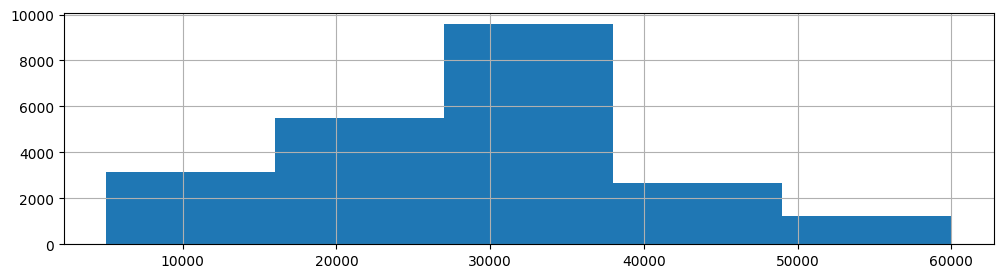

In [38]:
data['airports_nearest'].hist(bins = 5, figsize = (12,3), range=(5000, 60000))

<Axes: >

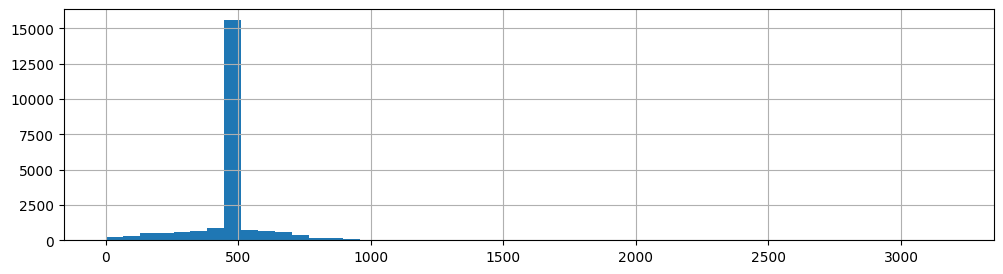

In [39]:
data['parks_nearest'].hist(bins = 50, figsize = (12,3))

<Axes: >

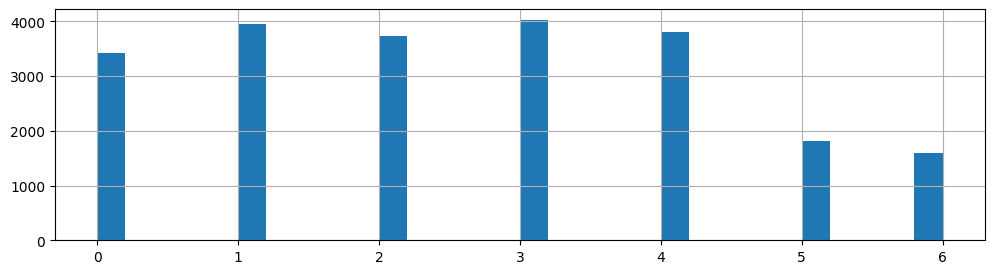

In [40]:
data['weekday'].hist(bins = 30, figsize = (12,3))

<Axes: >

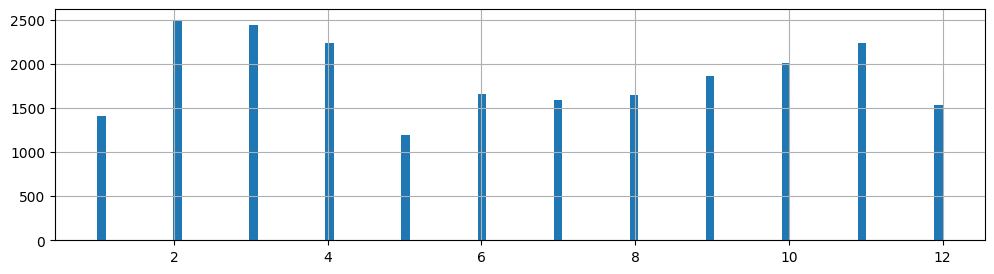

In [41]:
data['month'].hist(bins = 100, figsize = (12,3))

По гистограммах в зависимости от параметра видно:
1. Общая площадь. Наибольшее количество размещенных объявлений находится в пределах от 25 до 100 м2.
2. Жилая площадь. Наибольшее кол-во объявлений находится в диапазоне от 16 до 60 м2. 
3. Площадь кухни. Наибольшее кол-во объявлений находится в диапазоне от 5 до 15 м2
4. Цена объекта. Наибольшее число объявлений по цене от 1 до 15 млн.руб.
5. Количество комнат. Наибольшее число объявлений среди квартир с 1 до 3 комнат.
6. Высота потолков. Наибольшее число объявлений с квартирами от 2,5 до 3 м.
7. Этаж квартиры. Наибольшее число объявлений с квартирами от 1 до 5 этажа.
8. Тип этажа квартиры («первый», «последний», «другой»). Большинство квартир находятся ни на первом и не на последнем этаже.
9. Общее количество этажей в доме. Большинство квартир продаются в домах 5, 9, 12 и 16 этажей.
10. Расстояние до центра города в метрах. Основное расстояние до центра города составляет от 0 до 35 км.
11. Расстояние до ближайшего аэропорта. Основное расстояние до аэропорта составляет от 15 до 47 км.   
12. Расстояние до ближайшего парка. Основное расстояние до ближайшего парка составляет от 400 до 500 м.
13. День и месяц публикации объявления. Объявления размещают по будним дням. Большинство размещено в период с февраль по ноябрь.При это с февраля до июня идет небольшой спад, а зтем до ноября снова рост.
    
    

2.	Изучаем срок продажи

Среднее кол-во дней продажи: 175.0
Медианное кол-во дней продажи: 94.5


count    19360.000000
mean       175.263791
std        205.724169
min          3.000000
25%         45.000000
50%         94.500000
75%        227.000000
max       1199.000000
Name: days_exposition, dtype: float64

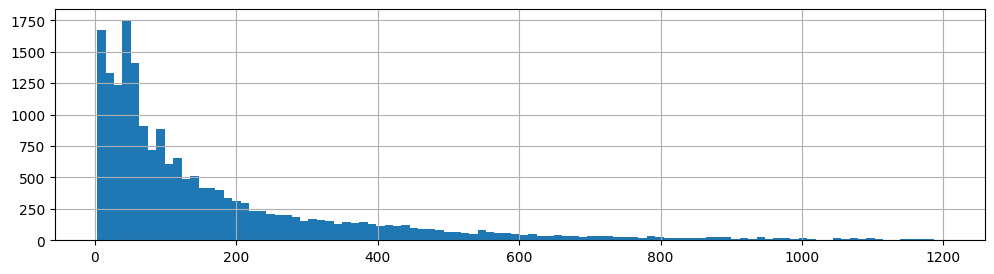

In [42]:
# Изучаем как быстро продавались квартиры.
data['days_exposition'].hist(bins = 100, figsize = (12,3))
print('Среднее кол-во дней продажи:', data['days_exposition'].mean().round())
print('Медианное кол-во дней продажи:',data['days_exposition'].median())
data['days_exposition'].describe()

3.	Какие факторы больше всего влияют на общую (полную) стоимость объекта?
    Изучите, зависит ли цена от:
    +	общей площади;
    +	жилой площади;
    +	площади кухни;
    +	количества комнат;
    +	этажа, на котором расположена квартира (первый, последний, другой);
    +	даты размещения (день недели, месяц, год).

<Axes: xlabel='year'>

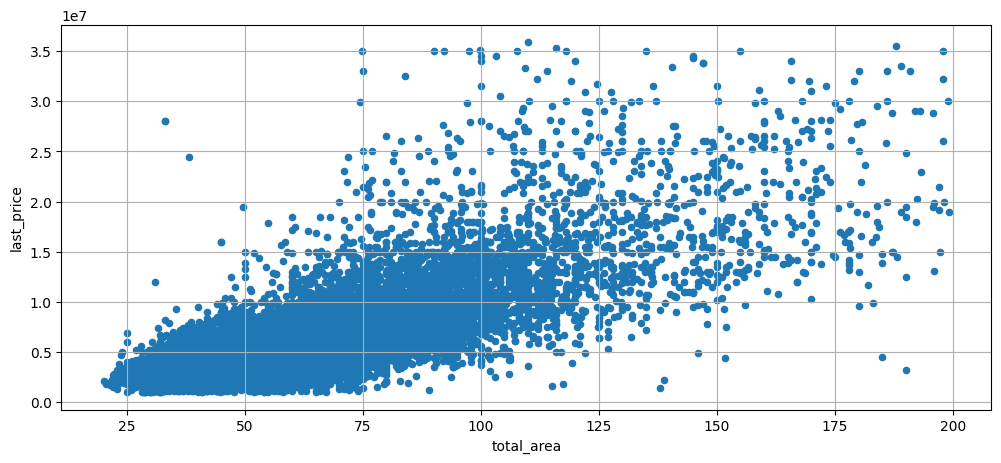

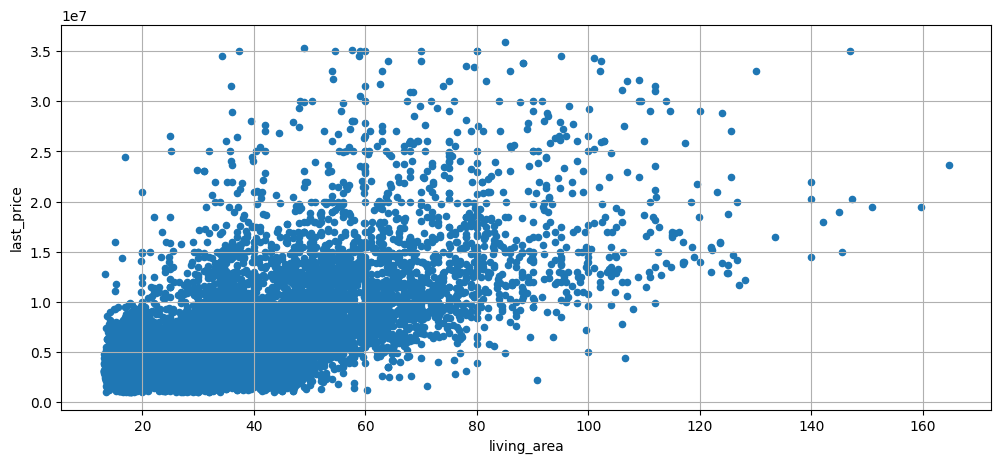

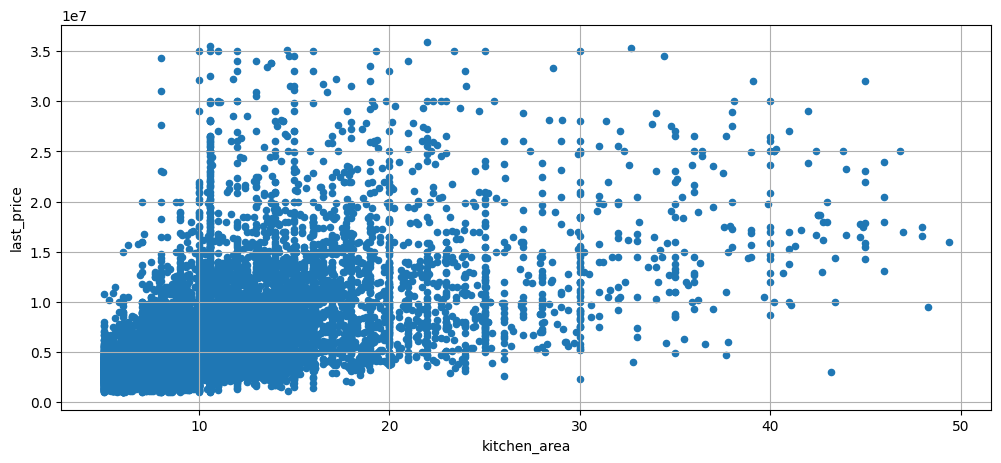

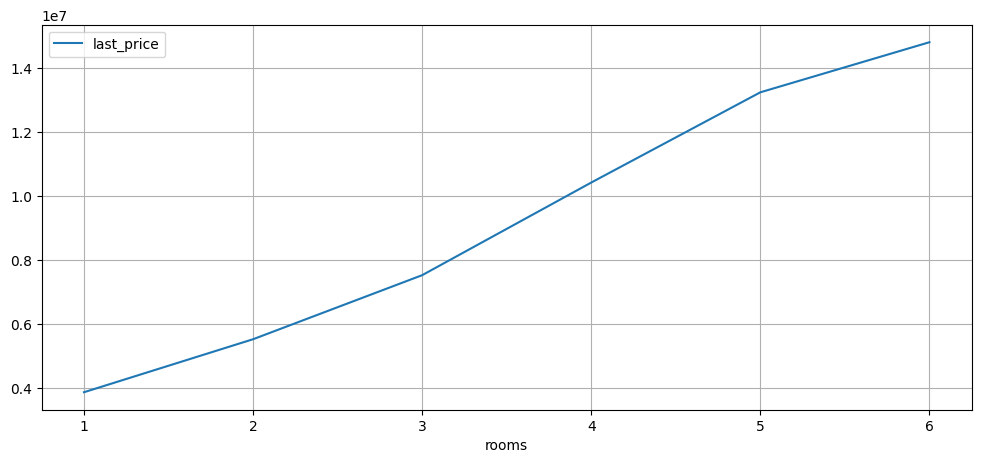

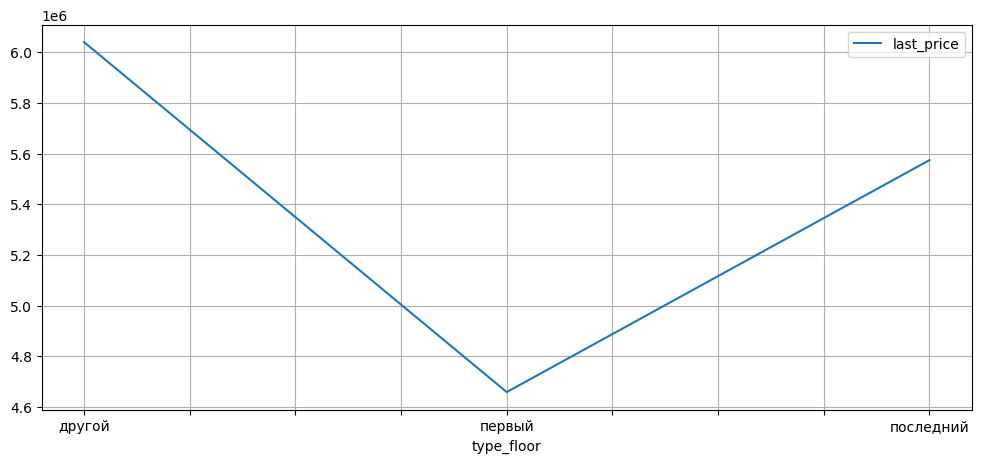

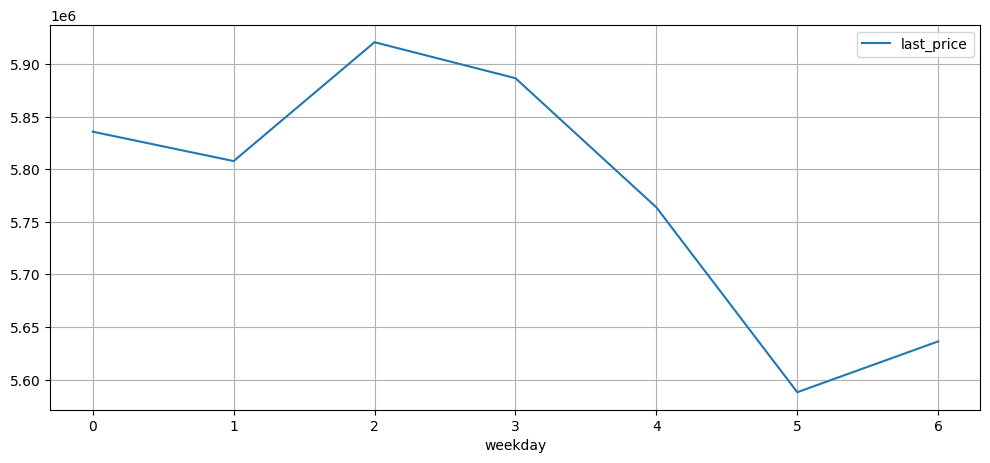

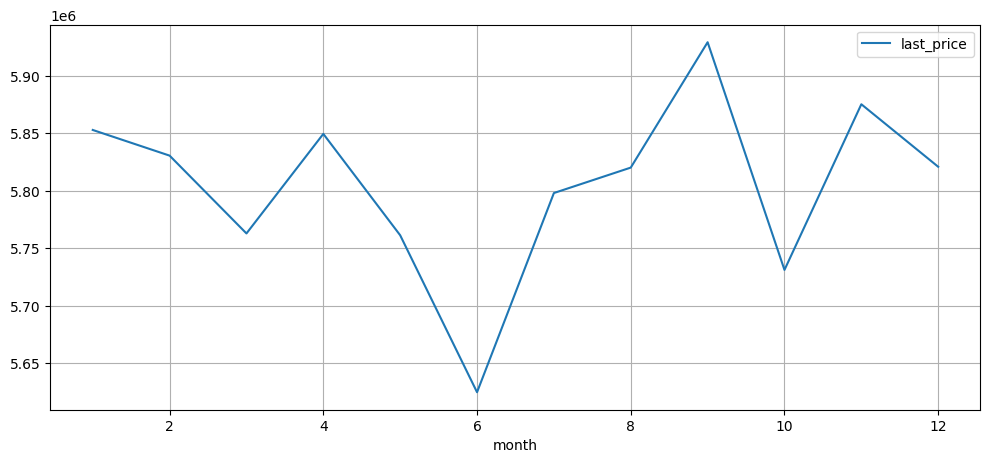

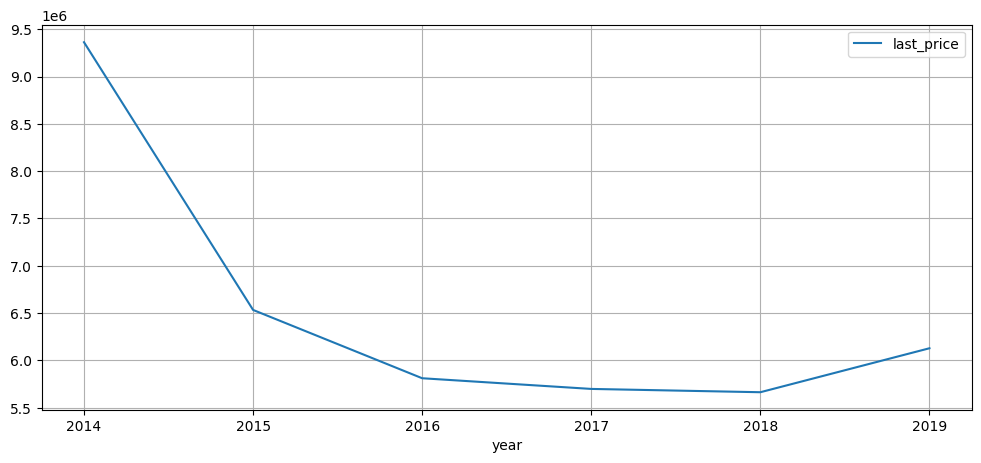

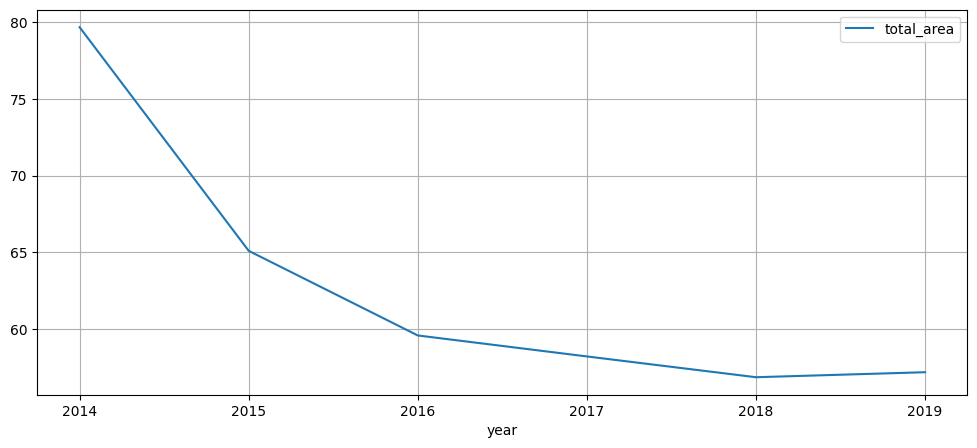

In [43]:
# Изучаем какие факторы больше всего влияют на общую (полную) стоимость объекта.
data.plot(x='total_area', y='last_price', style='o-', kind='scatter', grid=True, figsize=(12, 5))
data.plot(x='living_area', y='last_price', style='o-', kind='scatter', grid=True, figsize=(12, 5))
data.plot(x='kitchen_area', y='last_price', style='o-', kind='scatter', grid=True, figsize=(12, 5))
data.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(12, 5))
data.pivot_table(index='type_floor', values='last_price').plot(grid=True, figsize=(12, 5))
data.pivot_table(index='weekday', values='last_price').plot(grid=True, figsize=(12, 5))
data.pivot_table(index='month', values='last_price').plot(grid=True, figsize=(12, 5))
data.pivot_table(index='year', values='last_price').plot(grid=True, figsize=(12, 5))
data.pivot_table(index='year', values='total_area').plot(grid=True, figsize=(12, 5))

In [44]:
data_factor = data.pivot_table(index='year', values='last_price', aggfunc=['count'])
data_factor.columns = ['count']
print(data_factor.sort_values(by = 'count', ascending=False).head(10))
data_factor2 = data.pivot_table(index='year', values='total_area', aggfunc=['mean'])
data_factor2.columns = ['mean']
print(data_factor2.sort_values(by = 'mean', ascending=False).head(10))

      count
year       
2018   8077
2017   7734
2019   2730
2016   2629
2015   1048
2014    109
           mean
year           
2014  79.679174
2015  65.092261
2016  59.571731
2017  58.203384
2019  57.173788
2018  56.847493



Факторы больше всего влияющие на общую (полную) стоимость объекта.
Исходя из графиков видно, что на общую стоимость объекта очень сильно влияет общая площадь. Также размещение объявления в субботу с самой большой ценой. Цены с ноября месяца вырастают. С 2014 года цены на жилье падали, но с 2018 начали потихоньку расти, но при этом и площадь продаваемых квартир тоже с годами снижается. 
Такой вывод мы делаем на основании построенных графиков. Но на цену влияет несколько и других факторов: 
        
+ изменение кол-ва записей — Данных достаточно данных для анализа и сравнения. И с годами их количетсво растет.
+ Основное кол-во объявлений в Санкт-Петербурге, более 50%, поэтому остальные регионы влияние оказывают незначительное.
+ Полный анализ соответствует полным периодам с 2015 по 2018 год. У квартир обычно нет большого перепада спада цен, так как этот ликвид все время в спросе.
+ изменение доли дорогих категорий в общей выборке (средние этажи) не сильно влияют, т.к. их цена незначительно дороже.


In [45]:
    columns = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'type_floor', 'year']
    subset = data[columns]
    subset.corr()

<ipython-input-45-522aa9494d6d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  subset.corr()


,total_area,living_area,kitchen_area,rooms,year
total_area,1.000000,0.925949,0.535789,0.787298,-0.071540
living_area,0.925949,1.000000,0.321284,0.877907,-0.061003
kitchen_area,0.535789,0.321284,1.000000,0.179103,-0.046166
rooms,0.787298,0.877907,0.179103,1.000000,-0.042805
year,-0.071540,-0.061003,-0.046166,-0.042805,1.000000


- Общая площадь коррелирует с другими площадями и количеством комнат.
- Площадь кухни не коррелирует с количеством комнат. Это логично, так как она одна.
- Все характеристики не коррелируют с годом размещения объявления.

                   mean_price_square  count
locality_name                              
Санкт-Петербург             110762.0  14888
Мурино                       85187.0    542
Кудрово                      95088.0    440
посёлок Шушары               77740.0    423
Всеволожск                   68787.0    384
Пушкин                      103028.0    355
Колпино                      75303.0    335
посёлок Парголово            89978.0    308
Гатчина                      69039.0    301
Выборг                       58673.0    228


<Axes: ylabel='locality_name'>

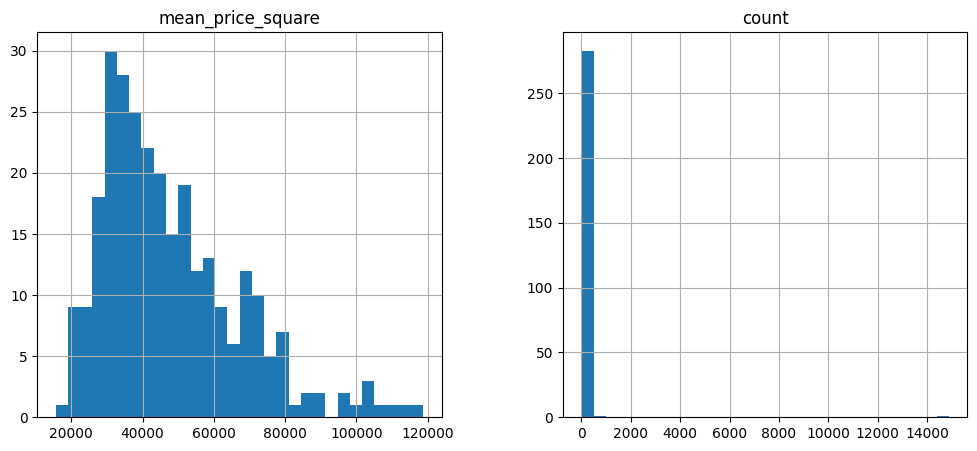

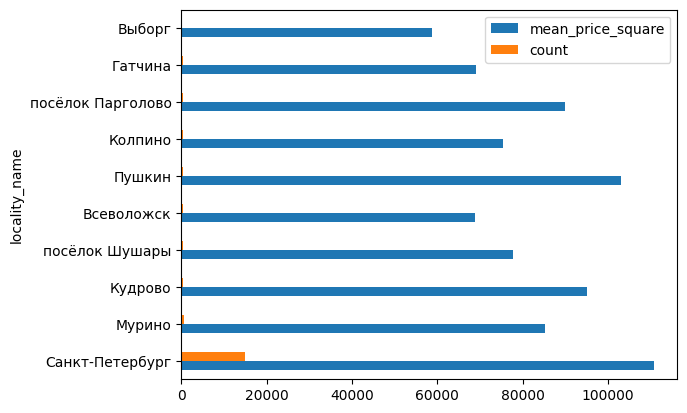

In [46]:
#Находим 10 населенных пунктов с наибольшим количеством объявлений.
data['locality_name'].value_counts().head(10)
#Сделаем группировку по населенным пунктам, найдем средние площади и отсортируем в порядке убывания количества объявлений.
data_grouped = data.pivot_table(index='locality_name', values='price_square', aggfunc=['mean', 'count'])
data_grouped.columns = ['mean_price_square', 'count']
data_grouped['mean_price_square'] = data_grouped['mean_price_square'].round()
print(data_grouped.sort_values(by = 'count', ascending=False).head(10))
data_grouped.hist(bins= 30, figsize=(12, 5))
data_grouped.sort_values(by = 'count', ascending=False).head(10).plot(kind = 'barh')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square,weekday,month,year,type_floor,cityCenters_nearest_km
2414,20,29500000,115.00,2017-07-21,3,3.000000,2,69.75,2,True,...,229.0,3.0,172.0000,328.0,256521.739130,4,7,2017,последний,27.0
18386,15,24800000,190.00,2014-12-10,4,2.620000,4,104.10,3,True,...,114.0,0.0,517.9809,NaN,130526.315789,2,12,2014,другой,27.0
140,8,16912000,105.70,2016-12-09,2,2.700000,3,48.40,1,True,...,366.0,3.0,179.0000,390.0,160000.000000,4,12,2016,первый,27.0
7996,17,16600000,106.00,2017-12-02,4,3.200000,3,50.00,3,True,...,254.0,0.0,517.9809,NaN,156603.773585,5,12,2017,последний,27.0
15578,20,16000000,101.90,2018-01-08,2,2.870000,4,48.10,1,True,...,273.0,3.0,368.0000,NaN,157016.683023,0,1,2018,первый,27.0
12466,11,15000000,89.60,2017-01-31,3,2.771499,3,57.00,3,True,...,317.0,3.0,509.0000,357.0,167410.714286,1,1,2017,последний,27.0
748,13,14350000,74.00,2017-11-28,2,3.130000,5,30.00,3,True,...,1496.0,0.0,517.9809,128.0,193918.918919,1,11,2017,другой,27.0
4400,4,12300000,78.65,2017-09-09,3,2.771499,5,48.00,1,True,...,403.0,0.0,517.9809,4.0,156389.065480,5,9,2017,первый,27.0
2948,23,11350000,75.00,2017-08-15,3,3.500000,2,52.70,2,True,...,216.0,3.0,153.0000,207.0,151333.333333,1,8,2017,последний,27.0
22037,15,10900000,145.00,2017-04-17,2,3.500000,2,39.00,2,False,...,216.0,3.0,153.0000,188.0,75172.413793,0,4,2017,последний,27.0


type_floor
cityCenters_nearest_km type_floor            
3.0                    другой             197
                       первый              52
                       последний           72
4.0                    другой             456
                       первый              74
                       последний          106
5.0                    другой             610
                       первый              74
                       последний          122
6.0                    другой             387
                       первый              58
                       последний           78
7.0                    другой             284
                       первый              29
                       последний           54

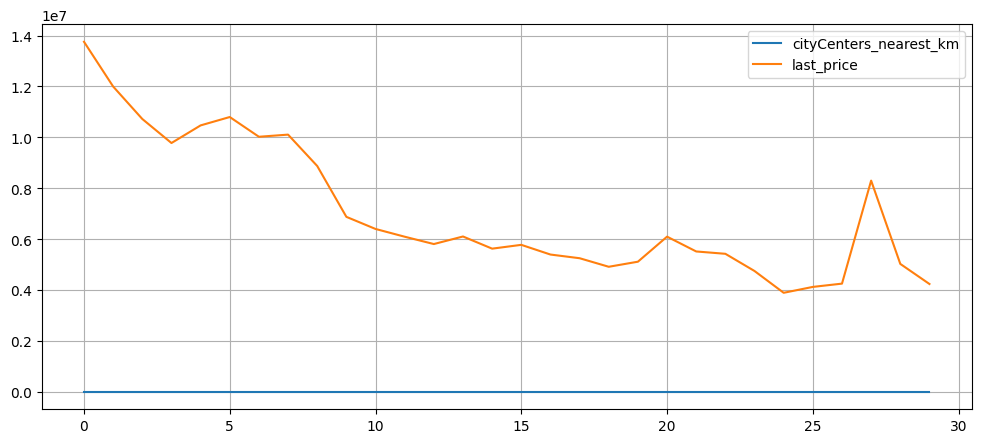

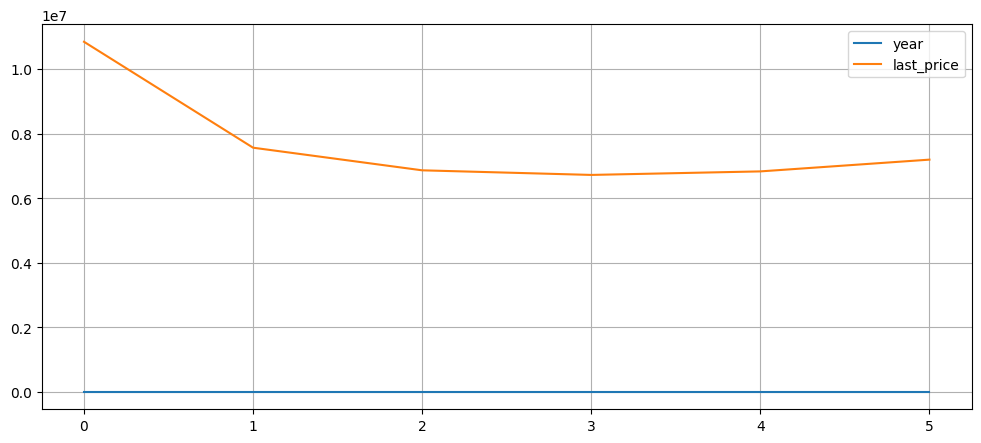

In [47]:
#Находим среднюю цену каждого км по объектам Санкт-Петербурга
data_saint_petersburg = data[data['locality_name'] == 'Санкт-Петербург']
data_saint_petersburg_price_km = data_saint_petersburg.pivot_table(index='cityCenters_nearest_km', values = 'last_price', aggfunc='mean').reset_index()
data_saint_petersburg_price_km.plot(grid=True, figsize=(12, 5))
data_saint_petersburg_price_km.describe()
data_saint_petersburg_price_year = data_saint_petersburg.pivot_table(index='year', values = 'last_price').reset_index()
data_saint_petersburg_price_year.plot(grid=True, figsize=(12, 5))
#Находим причины роста цены на отрезке 3-5 км и всплеск на 27 км.
data_27km = data.query(('locality_name == Санкт-Петербург') and ('cityCenters_nearest_km == 27'))
display(data_27km.sort_values(by = 'last_price', ascending=False).head(10))
data_3_7km = data_saint_petersburg.groupby(['cityCenters_nearest_km', 'type_floor']).agg({'type_floor':'count'})
display(data_3_7km.query('3 <= cityCenters_nearest_km <= 7'))


### Общий вывод

Посчитали среднюю стоимость квадратного метра для 10 населенных пунктов, где больше всего объявлений.
Самая высокая стоимость квадратного метра в Санкт-Петербурге, самая низкая в Выборге.

Средняя цена каждого километра для квартир в Санкт-Петербурге составляет 306 тыс руб. Стоимость объектов зависит от расстояния до центра города. Чем ближе к центру, тем стоимость его дороже. И на промежутке от 26 км до 29 км есть всплеск стоимости квартир. При более детальном рассмотрении данный всплеск вызван тем, что есть 2 объявления с стоимостью свыше 24 млн.руб.(возможно это  квартиры премиум класса). Также пик и провал на квартирах, размещенных в пределах от 3 км до 5 км, обусловлен тем, что квартиры на 3 км в основном находятся в соотношении 1:1 (другой= первый+последний). А на 4 и 5 км это соотношение сильно меняется. Квартир на другом этаже намного больше, чем на первом и последнем в сумме. Соответственно и цена идет вверх.  

Вывод:
Мы проанализировали рынок недвижимости. Изучили и описали параметры объявлений. Провели корреляции зависимотей цены от этих параметров. Выявили сроки продажи квартир. Выявили, что больше всего на цену квартиры влияет ее площадь.
Поняли, что рынок недвижимости в ценах падает, и только последний год держится на ровном месте. Посчитали среднюю стоимость квадратного метра по 10 населенным пунктам, где больше всего размещено объявлений. И то, что на рынке Санкт-Петербурга стоимость также зависит от близости расположения к центру города.


In [48]:
#  check
data_27km.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square,weekday,month,year,type_floor,cityCenters_nearest_km
109,2,7497600,62.5,2015-12-08,2,2.771499,5,35.5,5,True,...,517.000000,0.0,517.9809,1048.0,119961.600000,1,12,2015,последний,27.0
140,8,16912000,105.7,2016-12-09,2,2.700000,3,48.4,1,True,...,366.000000,3.0,179.0000,390.0,160000.000000,4,12,2016,первый,27.0
439,9,8570000,72.0,2018-08-11,3,3.000000,6,42.0,4,True,...,490.804555,0.0,517.9809,149.0,119027.777778,5,8,2018,другой,27.0


### Бонус

Диаграмма рассеяния

In [49]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

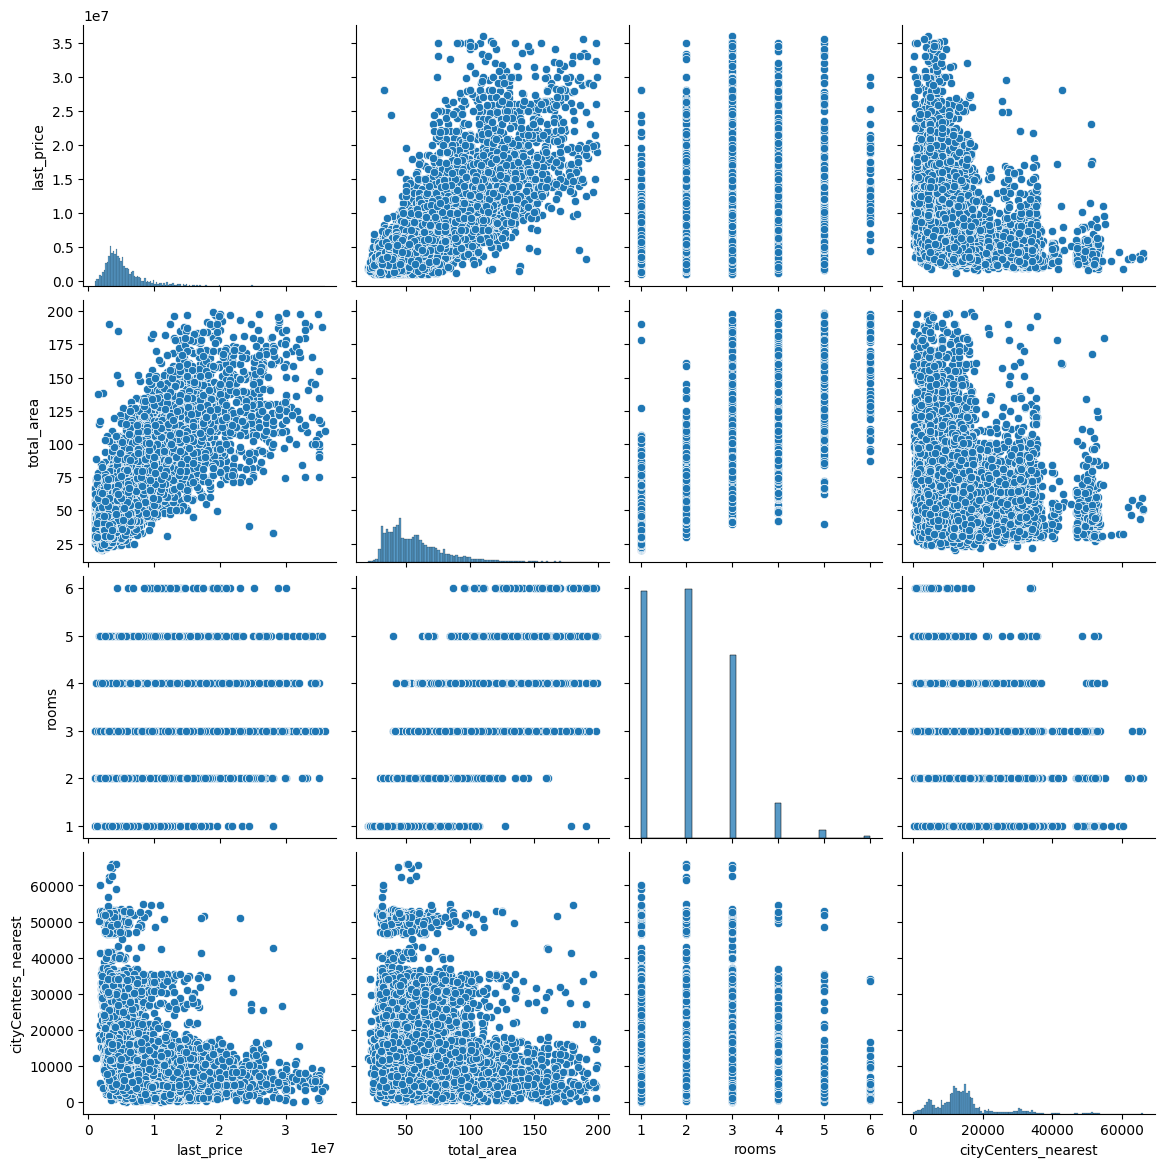

In [50]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])
plt.gcf().set_size_inches(12,12);


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


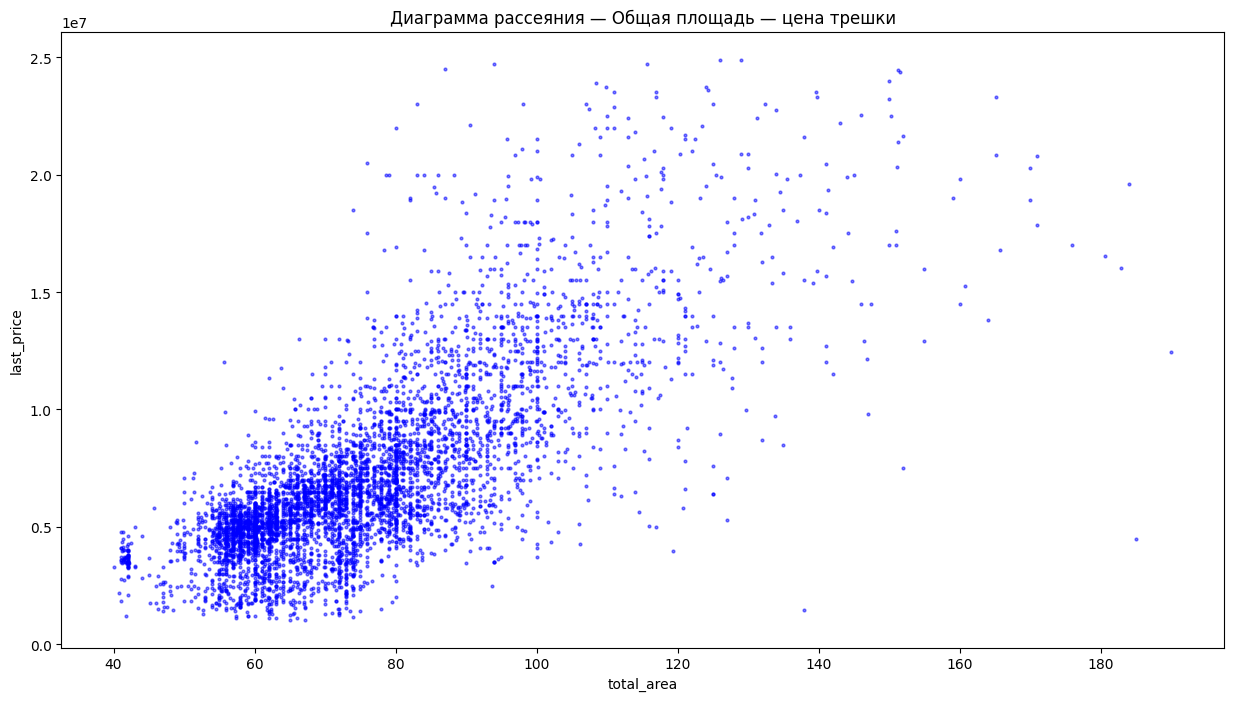

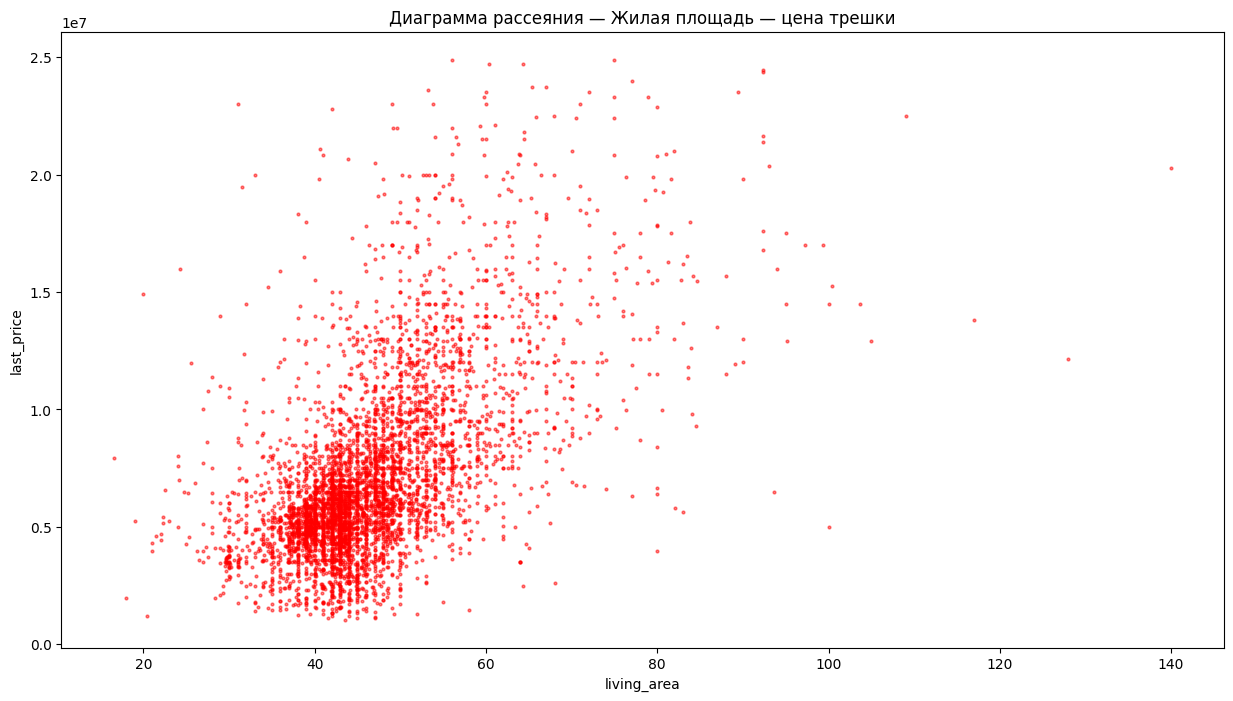

In [51]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

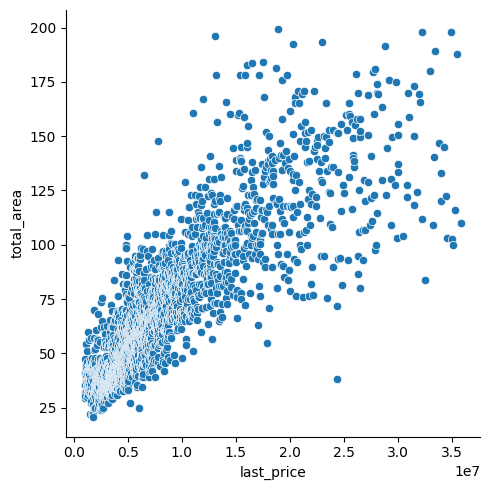

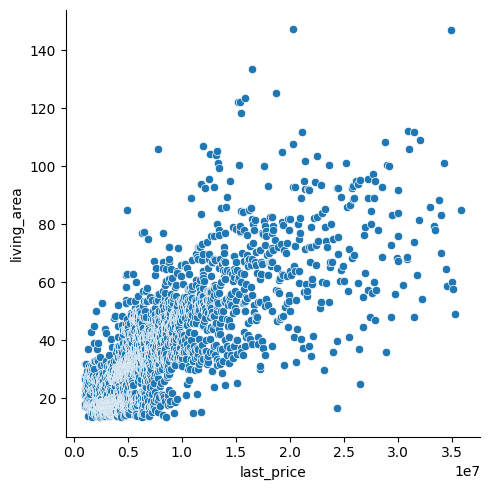

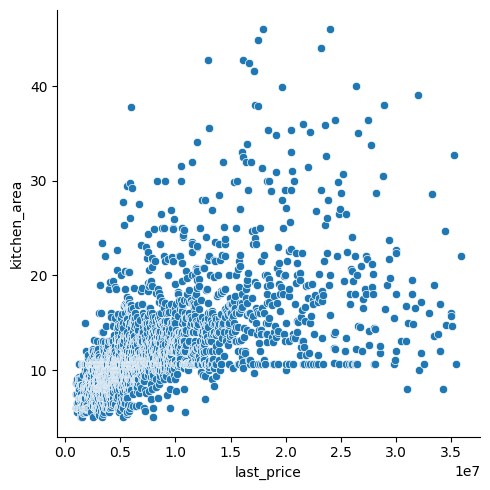

In [52]:
# check
price_pivot_area = data.pivot_table(index='last_price', values=([
    'total_area', 'living_area', 'kitchen_area']), aggfunc='median')
price_pivot_area = price_pivot_area.reset_index()
# Посмотрим на диаграммы рассеяния для столбцов 'total_area', 'living_area', 'kitchen_area'.
for row in ['total_area', 'living_area', 'kitchen_area']:
    sns.relplot(data=price_pivot_area, x='last_price', y=row, kind='scatter')

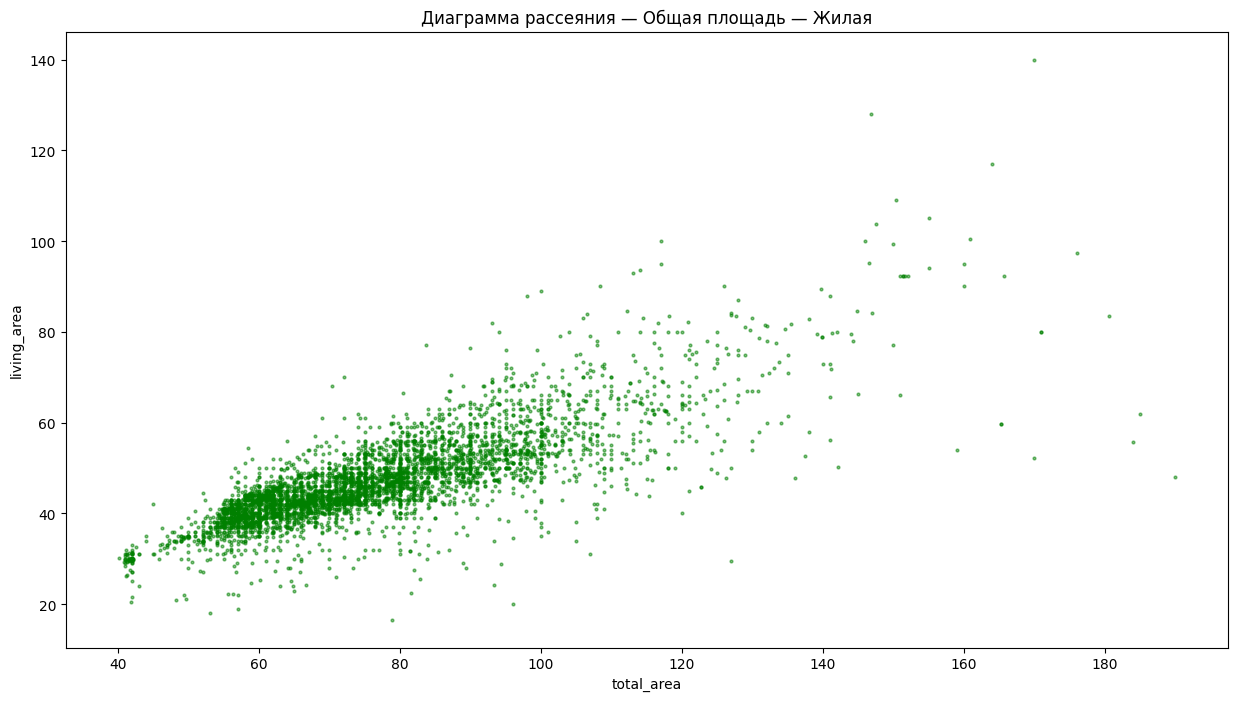

In [53]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'g', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22327 entries, 0 to 23697
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22327 non-null  int64         
 1   last_price              22327 non-null  int64         
 2   total_area              22327 non-null  float64       
 3   first_day_exposition    22327 non-null  datetime64[ns]
 4   rooms                   22327 non-null  int64         
 5   ceiling_height          22327 non-null  float64       
 6   floors_total            22327 non-null  int64         
 7   living_area             20576 non-null  float64       
 8   floor                   22327 non-null  int64         
 9   is_apartment            22327 non-null  bool          
 10  studio                  22327 non-null  bool          
 11  open_plan               22327 non-null  bool          
 12  kitchen_area            22327 non-null  float6

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод